## <font color="blue">Disciplina: Inteligência Artificial</font>

### <font color="red"><i>Data Preparation</i></font>
##### <font color="black">Neste Notebook o grupo encontrará os resultados do processo de preparação dos dados de imóveis capturados em março de 2021 a respeito de imóveis de São Caetano do Sul. Utilize este arquivo do Jupyter Notebook e faça a preparação dos dados utilizando o dataset  RESULTANTE que você obteve após a integração do arquivo “bdSCS_final_csv.csv” com os outros dois arquivos, dos 20 disponibilizados, realizada na etapa anterior da disciplina. Para fazer a preparação dos dados, basta: ler o dataset gerado por você (obtido na etapa anterior da disciplina) e reexecutar este Notebook. Fique atento e veja se o seu dataset NECESSITA DE ALGUMA preparação adicional além daquelas indicadas e realizadas por mim neste arquivo envolvendo o meu dataset. Percebendo essa necessidade, realize essa preparação e informe no relatório, ok!</font>
#### <font color="black"><b>Atividade</b>: Seguir as orientações que constam no arquivo "IA_EAD_AulaIV_DataPreparation_Orientacoes.pdf" e fazer a entrega do solicitado pelo AVA da disciplina na data estipulada .</font>
### <font color="black" size='3'><b>Grupo em ordem alfabética (máx. 3 alunos) </b></font>
<html>
<table border="1px">
<tr>
<td bgcolor="Aquamarine">Pedro Machado Gomes Caixeta</td>
<td bgcolor="Aquamarine">10314309</td>
</tr>
<tr>
<td bgcolor="white">nome 1</td>
<td bgcolor="white">RA 1</td>
</tr>
<tr>
<td bgcolor="white">nome 2</td>
<td bgcolor="white">RA 2</td>
</tr>
    <tr>
<td bgcolor="white">nome 3</td>
<td bgcolor="white">RA 3</td>
</tr>
    </table>
</html>

# Preparação dos dados

In [189]:
import sklearn as sl
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'1.5.2'

## Revisando a Análise Exploratória dos Dados: 
## Estatística Descritva

In [190]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
# Leitura do arquivo CSV com separador "," e codificação UTF-8
# SUBSTITUIR AQUI O NOME DO SEU DATASET, OBTIDO NA ETAPA ANTERIOR, E REEXECUTE ESTE NOTEBOOK
dfimoveis_SCS = pd.read_csv('bdSCS_final_profIvan.csv', sep = ',', encoding = 'UTF-8')

In [191]:
# Mostra os 5 primeiros registros (objetos)
dfimoveis_SCS.head()

,Unnamed: 0,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,0,2,Santa Paula,106,3,2,3,0,0,0,0,0,755.0,555000
1,1,1,São José,138,3,2,2,0,0,0,0,0,NaN,750000
2,2,2,Centro,70,2,2,1,0,0,0,0,0,609.0,474169
3,3,2,Santo Antônio,162,3,3,2,0,0,0,0,0,1300.0,760000
4,4,2,Santa Paula,66,2,2,1,0,0,0,1,1,NaN,477000


In [192]:
# Remove o campo Unnamed: 0 do grupo de imóveis
dfimoveis_SCS.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [193]:
# Apresenta os dados dos três objetos iniciais
dfimoveis_SCS.head(3)

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,2,Santa Paula,106,3,2,3,0,0,0,0,0,755.0,555000
1,1,São José,138,3,2,2,0,0,0,0,0,NaN,750000
2,2,Centro,70,2,2,1,0,0,0,0,0,609.0,474169


In [194]:
# apresenta os tipos de dados dos atriutos do dataset
dfimoveis_SCS.dtypes

tipo               int64
bairro            object
area_total         int64
quartos            int64
banheiros         object
vagas             object
academia           int64
churrasqueira      int64
elevador           int64
salao_festa        int64
piscina            int64
condominio       float64
preco              int64
dtype: object

O tipo dos dados é muito importante. Pode ser necessário converter strings, ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários.

No caso dos imóveis, observe banheiros e vagas deveriam ser inteiros. Algo deve ser feito.

<center><font size='3'>Caracterização dos dados – Conjunto de Imóveis de São Caetano do Sul</font></center>
<center><font size='2'>bdSCS_final_csv.csv</font></center>
<html>
<table border="1px">
<tr>
<td bgcolor="Aquamarine">Variável (Atributo)</td>
<td bgcolor="Aquamarine">Tipo (Qualitativo/Quantitativo)</td>
<td bgcolor="Aquamarine">Escala (Ordinal/Nominal) - (Discreto/Contínuo)</td>
</tr>
<tr>
<td bgcolor="Ivory">Tipo</td>
<td><center>Qualitativo</center></td>
<td><center>Nominal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">bairro</td>
<td><center>Qualitativo</center></td>
<td><center>Nominal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">area_total</td>
<td><center>Quantitativo</center></td>
<td><center>Discreto</center></td>
</tr>
<tr >
<td bgcolor="Ivory">quartos</td>
<td><center>Quantitativo</center></td>
<td><center>Discreto</center></td>
</tr>
<tr>
<td bgcolor="Ivory">banheiros</td>
<td><center>Quantitativo</center></td>
<td><center>Discreto</center></td>
</tr>
<tr>
<td bgcolor="Ivory">vagas</td>
<td><center>Quantitativo</center></td>
<td><center>Discreto</center></td>
</tr>
<tr>
<td bgcolor="Ivory">academia</td>
<td><center>Qualitativo</center></td>
<td><center>Nominal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">churrasqueira</td>
<td><center>Qualitativo</center></td>
<td><center>Nonimal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">elevador</td>
<td><center>Qualitativo</center></td>
<td><center>Nonimal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">salao_festa</td>
<td><center>Qualitativo</center></td>
<td><center>Nonimal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">piscina</td>
<td><center>Qualitativo</center></td>
<td><center>Nonimal</center></td>
</tr>
<tr>
<td bgcolor="Ivory">condominio</td>
<td><center>Quantitativo</center></td>
<td><center>Contínuo</center></td>
</tr>
<tr>
<td bgcolor="Ivory">preco</td>
<td><center>Quantitativo</center></td>
<td><center>Contínuo</center></td>
</tr>
</table>

In [195]:
# Mostra a dimensão (total de registros)
dfimoveis_SCS.shape

(6381, 13)

Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.

Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Porém, treine seu modelo em um subset do seu conjunto de dados maior (70% a 75%) e depois aplique o modelo a novos dados (30% a 25%).

In [196]:
# Detecta registros (objetos) - Nulos (NaN)
# Observe que há objetos contendo o condomínio nulo. Neste caso, vamos removê-los.
dfimoveis_SCS.isnull().sum()

tipo              0
bairro            0
area_total        0
quartos           0
banheiros         0
vagas             0
academia          0
churrasqueira     0
elevador          0
salao_festa       0
piscina           0
condominio       28
preco             0
dtype: int64

In [197]:
# Verifica se há registros (objetos) duplicados
dfimoveis_SCS.duplicated().sum()

1116

In [198]:
# Groupby pelo tipo
# Há poucas casas tipo = '1', refletir se melhor remover!
dfimoveis_SCS.groupby('tipo').size()

tipo
1     109
2    6272
dtype: int64

In [199]:
# Groupby pelo bairro
# Aqui temos alguns problemas, 1) acentos nos nomes dos campos (serão transformados em nomes de atributos numéricos)
# 2) Bairro Jardin Sao Caetano tem com acentos e sem acentos.
dfimoveis_SCS.groupby('bairro').size()

bairro
Barcelona             720
Boa Vista             455
Centro                168
Cerâmica              923
Fundação              242
Jardim Sao Caetano    147
Jardim São Caetano     11
Mauá                  196
Nova Gerty            262
Olímpico              727
Osvaldo Cruz          149
Prosperidade            2
Santa Maria           980
Santa Paula           974
Santo Antônio         424
São José                1
dtype: int64

In [200]:
# Groupby pelo banheiros
# observe que há registros inválidos contendo -- e 2-3
# vamos remover os registros nos dois casos, pois para 2-3, provavelmente, há imóveis 
# contendo 2 ou 3 banheiros (neste caso áreas totais serão diferentes, então, melhor remover)
dfimoveis_SCS.groupby('banheiros').size()

banheiros
 --       180
 2-3       45
1        1934
12          1
2        2709
3        1166
4         233
5          52
6          53
7           6
8           2
dtype: int64

In [201]:
# Groupby por vagas
# observe que há registros inválidos contendo -- e 2-3
# vamos remover os registros nos dois casos, pois para 2-3, provavelmente, há imóveis 
# contendo 2 ou 3 vagas(neste caso áreas totais serão diferentes, então, melhor remover)
dfimoveis_SCS.groupby('vagas').size()

vagas
 --       180
 2-3       45
1        1955
10          1
2        2704
3        1144
4         246
5          49
6          50
7           1
8           6
dtype: int64

In [202]:
# Groupby pela academia
dfimoveis_SCS.groupby('academia').size()

academia
0    4511
1    1870
dtype: int64

In [203]:
# Groupby pela churrasqueira
dfimoveis_SCS.groupby('churrasqueira').size()

churrasqueira
0    2055
1    4326
dtype: int64

In [204]:
# Groupby pelo elevador
dfimoveis_SCS.groupby('elevador').size()

elevador
0    1132
1    5249
dtype: int64

In [205]:
# Groupby por salao_festa
dfimoveis_SCS.groupby('salao_festa').size()

salao_festa
0    1354
1    5027
dtype: int64

In [206]:
# Groupby por piscina
dfimoveis_SCS.groupby('piscina').size()

piscina
0    2604
1    3777
dtype: int64

In [207]:
# Sumário estatístico
dfimoveis_SCS.describe()

,tipo,area_total,quartos,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
count,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6381.000000,6353.000000,6.381000e+03
mean,1.982918,96.002507,2.426892,0.293058,0.677950,0.822598,0.787808,0.591913,377.665040,1.193589e+06
std,0.129587,57.047170,0.584698,0.455200,0.467299,0.382038,0.408892,0.491518,258.947445,1.692022e+06
min,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.400000e+02
25%,2.000000,65.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,105.000000,4.500000e+05
50%,2.000000,76.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,450.000000,5.100000e+05
75%,2.000000,106.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,520.000000,9.900000e+05
max,2.000000,1500.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2600.000000,1.570000e+07


Em problemas de classificação pode ser necessário balancear as classes. Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento. 

Não é o caso do nosso problema que envolve previsão de preço de imóvel, ou seja, regressão do aprendizado de máquina supervisionado.

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

In [208]:
# Correlação de Pearson
dfimoveis_SCS.select_dtypes(include=['float64', 'int64']).corr(method = 'pearson')

,tipo,area_total,quartos,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
tipo,1.000000,-0.302339,-0.195422,0.026421,-0.013209,0.103412,0.052864,0.003737,-0.055293,-0.036151
area_total,-0.302339,1.000000,0.532947,-0.009867,0.023002,-0.085138,-0.032768,0.016376,0.049051,0.270127
quartos,-0.195422,0.532947,1.000000,-0.067305,0.009903,-0.027897,-0.032116,0.038520,0.055467,0.066994
academia,0.026421,-0.009867,-0.067305,1.000000,-0.117725,-0.397707,0.176674,-0.364900,-0.009944,-0.027186
churrasqueira,-0.013209,0.023002,0.009903,-0.117725,1.000000,0.296261,0.269835,0.436321,-0.007544,0.001135
elevador,0.103412,-0.085138,-0.027897,-0.397707,0.296261,1.000000,0.285759,0.044278,-0.026394,-0.018076
salao_festa,0.052864,-0.032768,-0.032116,0.176674,0.269835,0.285759,1.000000,0.319325,-0.010579,0.003303
piscina,0.003737,0.016376,0.038520,-0.364900,0.436321,0.044278,0.319325,1.000000,-0.000539,0.025697
condominio,-0.055293,0.049051,0.055467,-0.009944,-0.007544,-0.026394,-0.010579,-0.000539,1.000000,0.012667
preco,-0.036151,0.270127,0.066994,-0.027186,0.001135,-0.018076,0.003303,0.025697,0.012667,1.000000


In [209]:
# Importação do matplotlib.plt
import matplotlib.pyplot as plt
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
%matplotlib inline

In [210]:
# Apresenta o mapa de calor em da correlação
import seaborn as sns
ax = sns.heatmap(dfimoveis_SCS.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(18,18)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);

ModuleNotFoundError: No module named 'seaborn'

Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [24]:
# Verificando o skew de cada atributo
dfimoveis_SCS.skew()

tipo            -7.455521
area_total       6.659797
quartos          0.732790
academia         0.909522
churrasqueira   -0.761851
elevador        -1.689357
salao_festa     -1.408184
piscina         -0.374116
condominio       0.155014
preco            2.833031
dtype: float64

Com o histograma podemos rapidamente avaliar a distribuição de cada atributo. Os histogramas agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. Com o histograma, você pode rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não. Isso também vai ajudar na identificação dos outliers.

Podemos ver que os atributos suites, vagas e preço possuem uma distribuição exponencial. Podemos ver que as colunas banheiros e quartos possuem uma distribuição normal.

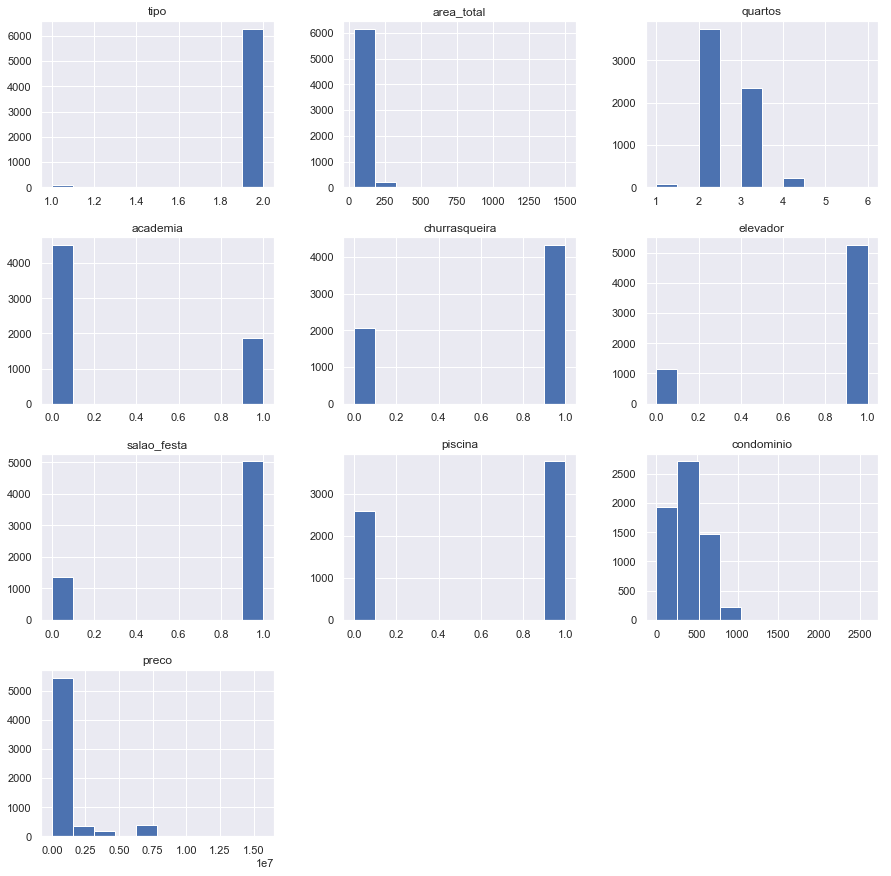

In [25]:
# Histograma Univariado
dfimoveis_SCS.hist(figsize=(15, 15)).all()

plt.show()

Os Density Plots são outra forma de visualizar a distribuição dos dados para cada atributo. O plot é como uma espécie de histograma abstrato com uma curva suave através do topo dos bins de um histograma. Pode ser mais fácil identificar a distribuição dos dados usando um density plot.

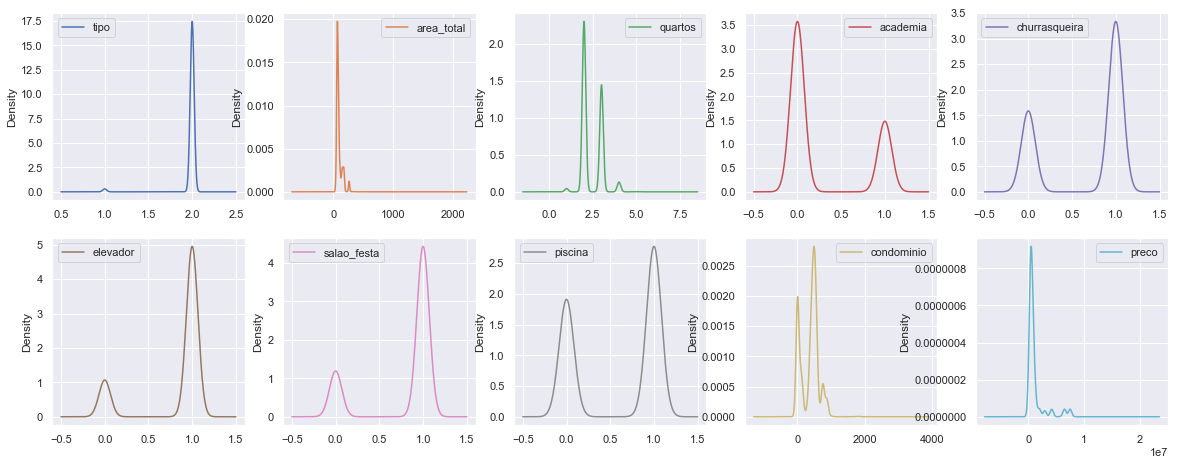

In [26]:
# Density Plot Univariado
dfimoveis_SCS.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))

plt.show()

Com os boxplots também podemos revisar a distribuição dos dados para cada atributo. A linha no centro (verde) é o valor da mediana (quartil 50%), a linha abaixo é o quartil 25% e a linha acima o quartil 75%. O boxplot ajuda a ter uma ideia da dispersão dos dados e os possíveis outliers.

Podemos ver que a dispersão dos dados é bem diferente entre os atributos. A coluna metros em claramente um outlier. As colunas vagas e suites possuem uma simetria muito próxima a valores de dados menores.

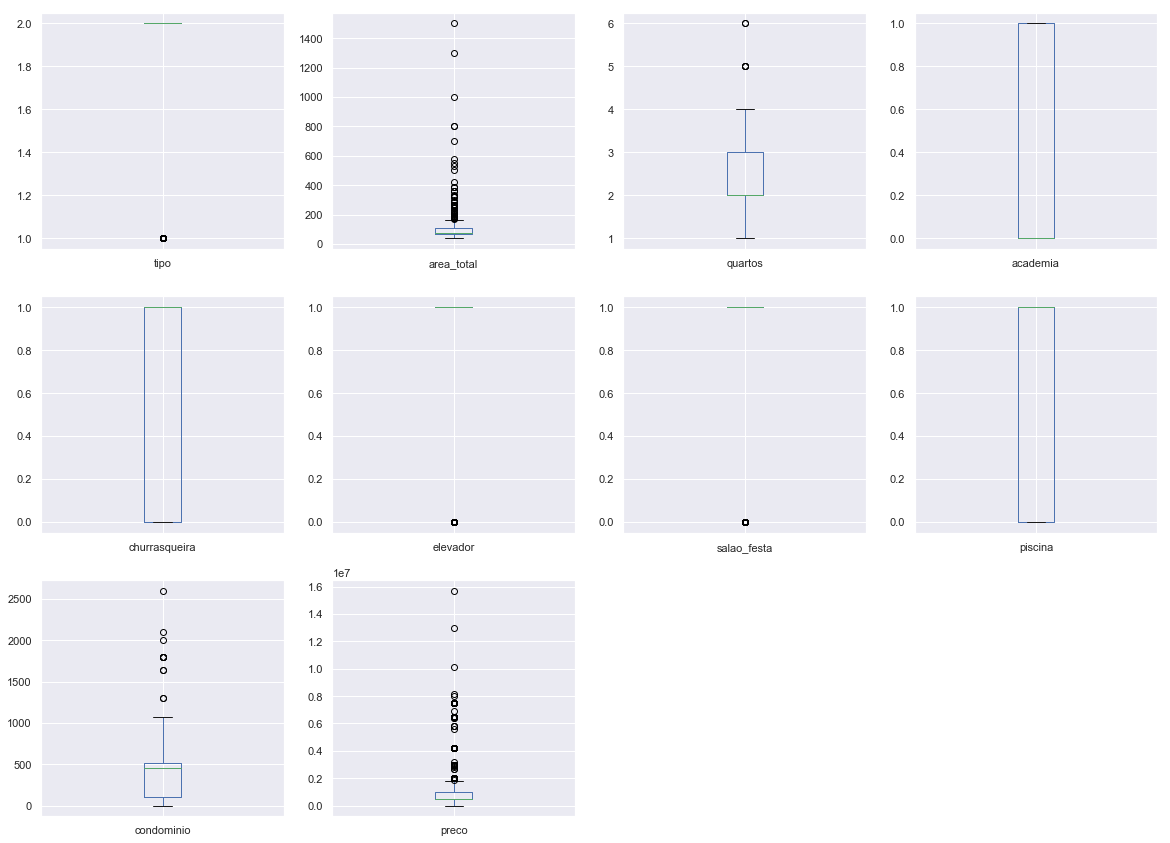

In [27]:
# Box and Whisker Plots
dfimoveis_SCS.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize=(20,20))

plt.show()

Um scatterplot mostra o relacionamento entre duas variáveis como pontos em duas dimensões, sendo um eixo para cada variável. Podemos criar um scatterplot para cada par de variáveis em nosso dataset. A exemplo da matriz de correlação, o scatterplot matrix é simétrico.

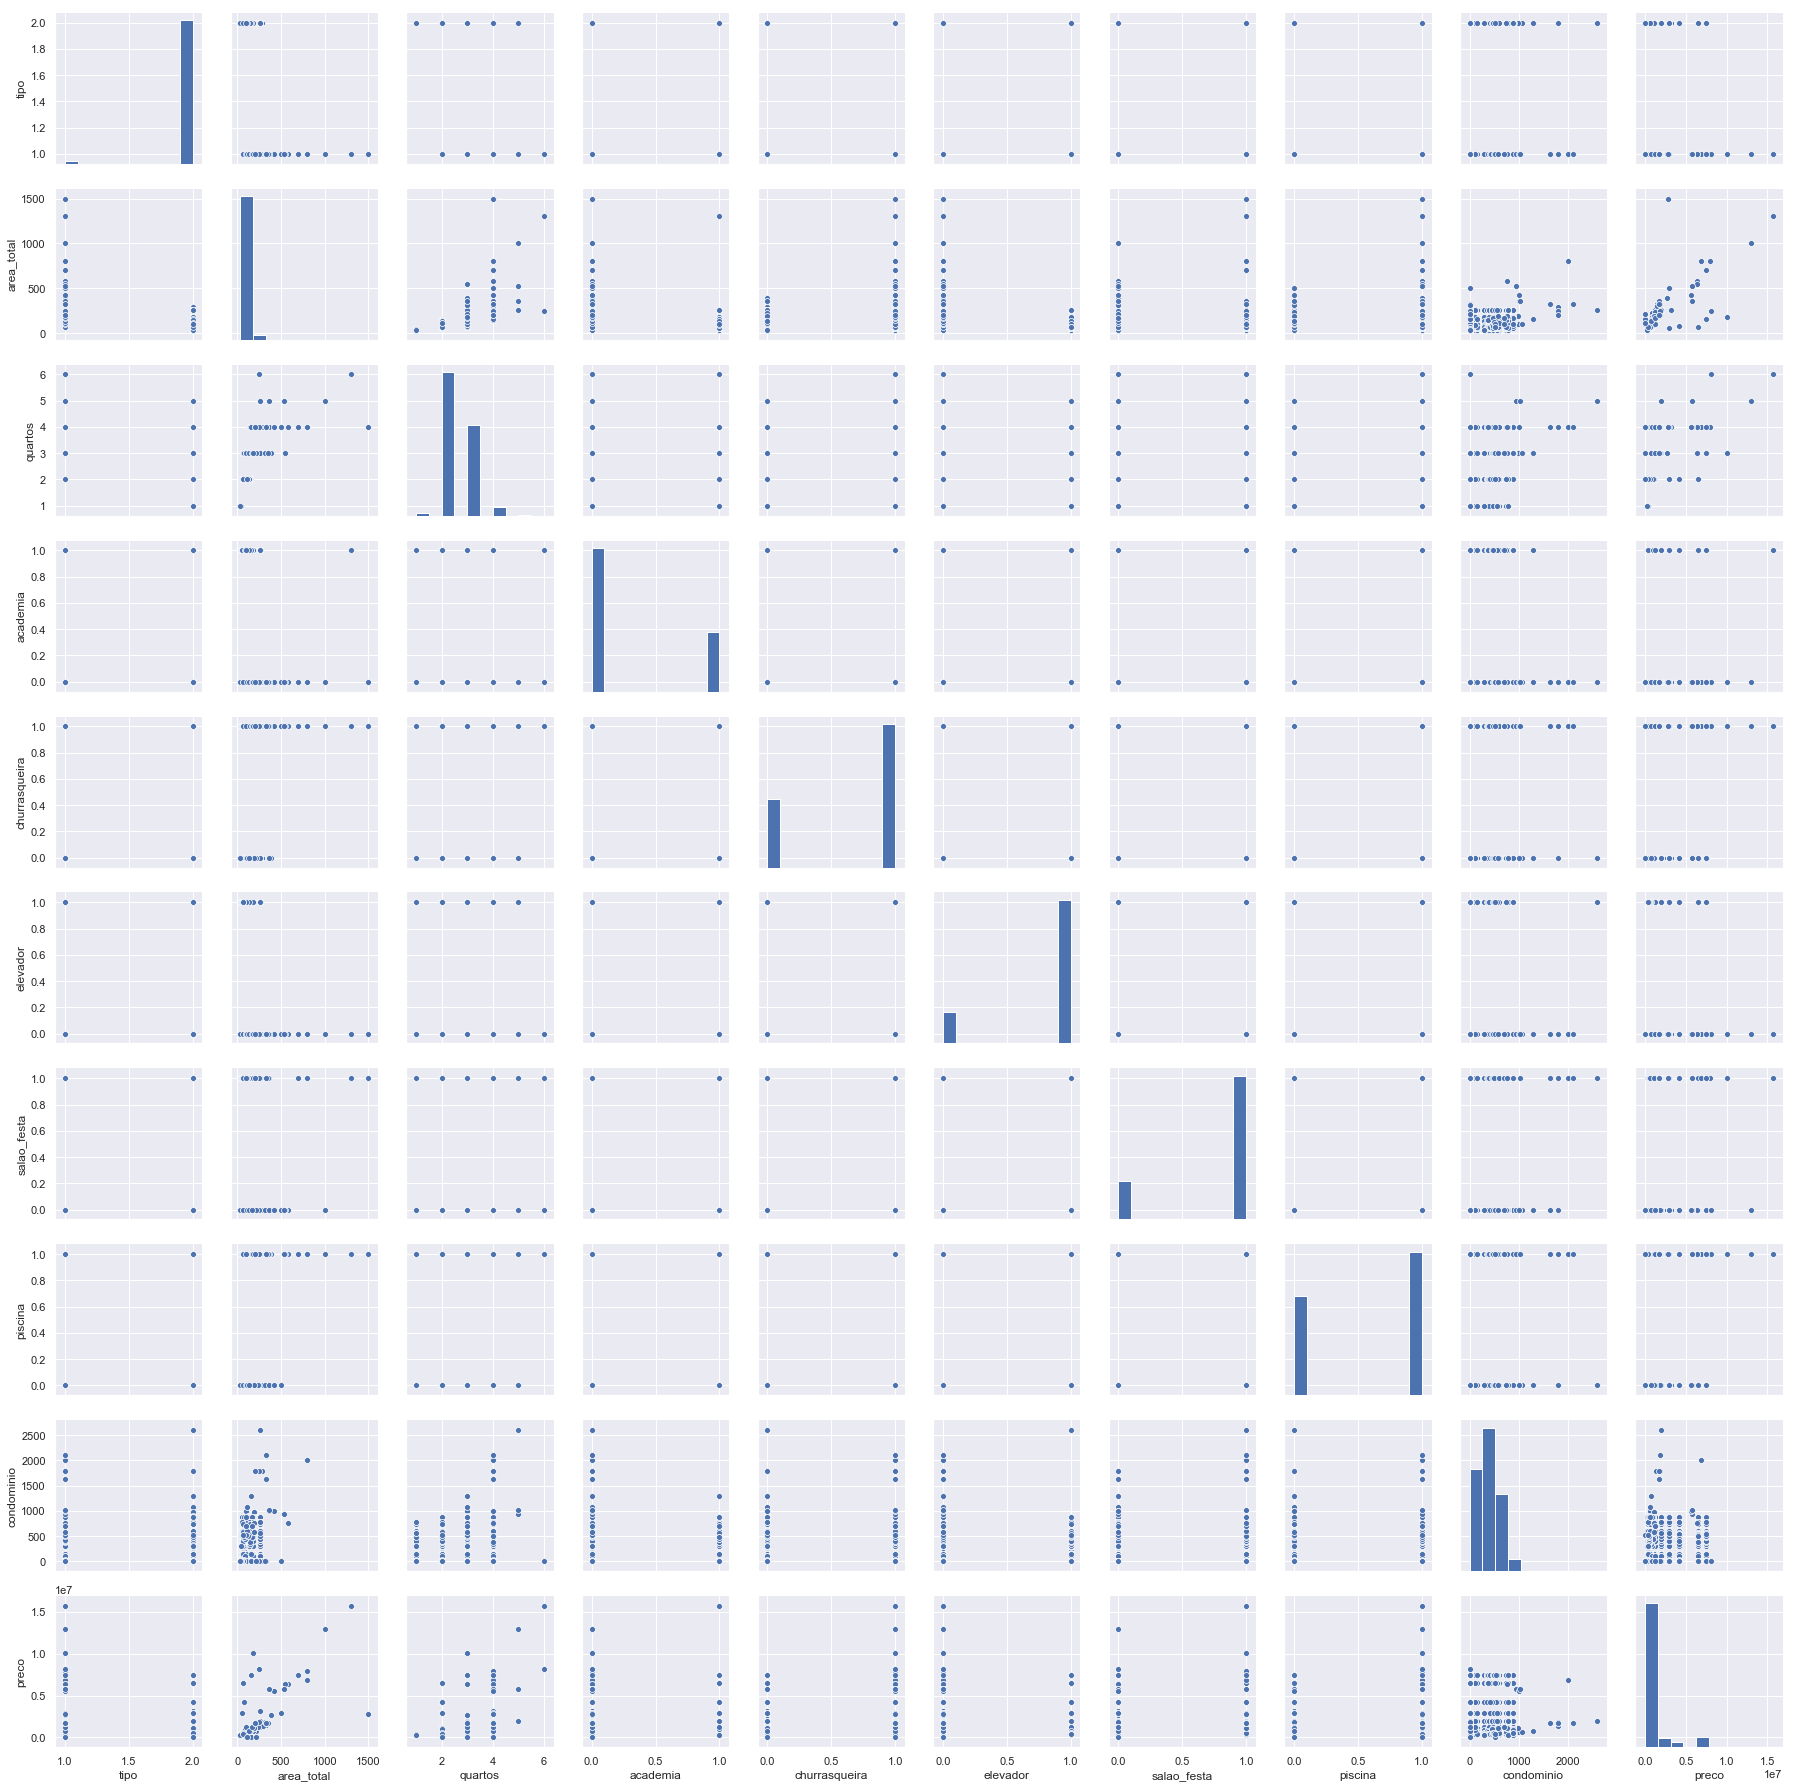

In [28]:
# Pairplot
sns.pairplot(dfimoveis_SCS)

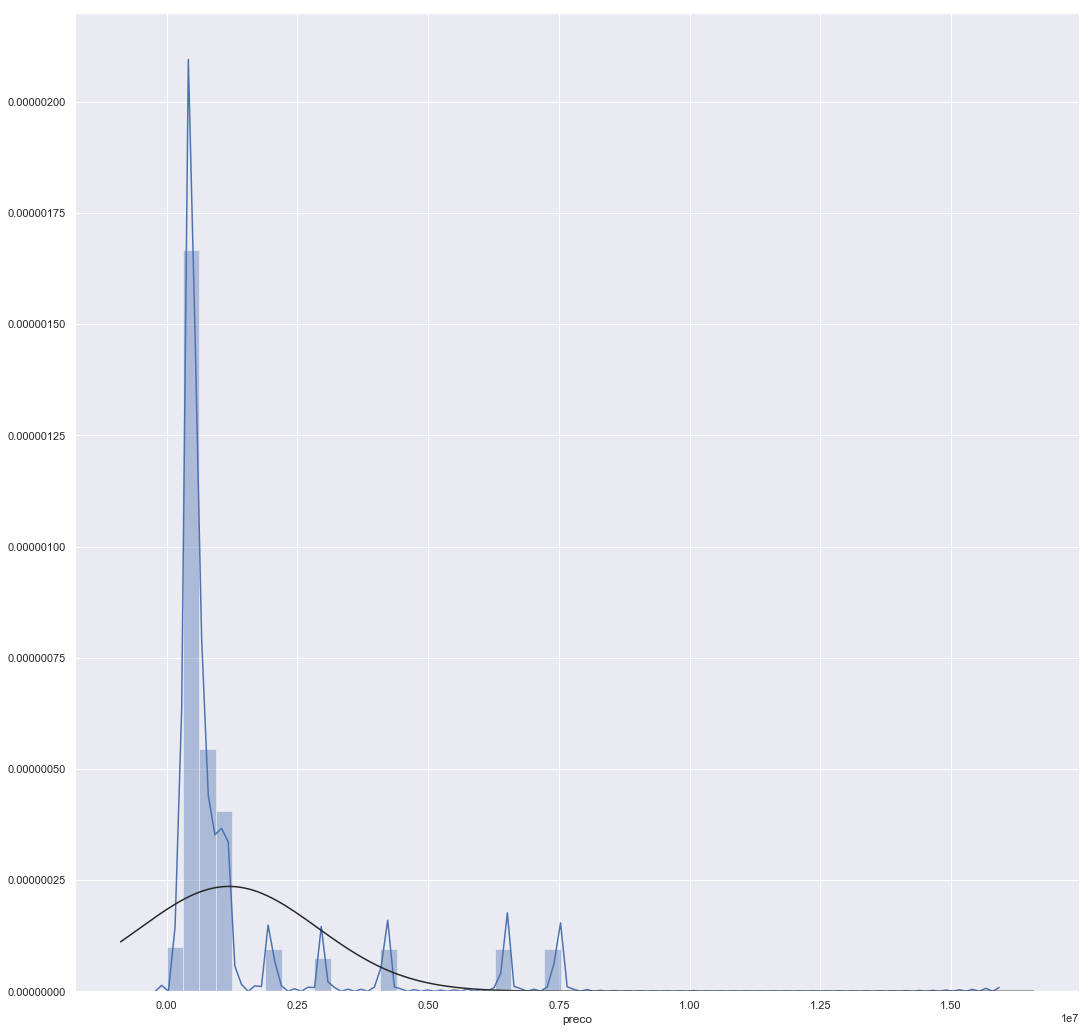

In [30]:
# Apresenta o histograma com uma curva suave e a normal
from scipy import stats
sns.distplot(dfimoveis_SCS.preco, fit = stats.norm);

## Preparação dos dados ou Pré-processamento dos dados

Muitos algoritmos esperam receber os dados em um formato específico. Então, é necessário preparar os dados em uma estrutura que seja adequada a eles.

É muito provável a necessidade de realizar tarefas de pré-processamento nos dados. Esse é um passo básico dentro do processo. 

O desafio é o fato de que cada algoritmo requer uma estrutura diferente, que pode requerer transformações distintas nos dados. 

Em alguns casos, é possível obter bons resultados sem um trabalho de pré-processamento (depende do dataset, do problema a ser resolvido, do algoritmo a ser utilizado). No entanto, é uma boa prática criar diferentes visões e transformações dos dados, de tal forma que seja possível testar diferentes algoritmos de Machine Learning.

### Eliminação Manual de Atributos

Quando um atributo não contribui para a estimativa do valor do atributo alvo, ele é considerado irrelevante.
Um atributo que possui o mesmo valor para todos os objetos ou para praticamente todos os objetos, também é irrelevante, pois não contém informação que ajude a distinguir objetos.

In [6]:
# Mostra o total de objetos resultantes
dfimoveis_SCS.shape

(6381, 13)

In [7]:
# Mostra os 3 primeiros registros (objetos)
dfimoveis_SCS.head(3)

,tipo,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,2,Santa Paula,106,3,2,3,0,0,0,0,0,755.0,555000
1,1,São José,138,3,2,2,0,0,0,0,0,NaN,750000
2,2,Centro,70,2,2,1,0,0,0,0,0,609.0,474169


In [8]:
# Fazendo agrupamento por tipo de imóvel
dfimoveis_SCS.groupby('tipo').size()

tipo
1     109
2    6272
dtype: int64

In [9]:
# Como há poucos objetos do tipo casa '1', primeiramente vamos eliminar os registros cujo tipo = 1
dfimoveis_SCS.drop(dfimoveis_SCS[dfimoveis_SCS.tipo == 1].index, inplace=True)

In [10]:
# Fazendo agrupamento por tipo de imóvel
dfimoveis_SCS.groupby('tipo').size()

tipo
2    6272
dtype: int64

In [11]:
# Vamos eliminar esta coluna, pois o atributo tornou-se irrelavante (todos os valores iguais)
dfimoveis_SCS.drop(columns=['tipo'], inplace=True)

In [12]:
# Mostra o total de objetos resultantes
dfimoveis_SCS.shape

(6272, 12)

In [13]:
# Mostra os 3 primeiros registros (objetos)
dfimoveis_SCS.head(3)

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Santa Paula,106,3,2,3,0,0,0,0,0,755.0,555000
2,Centro,70,2,2,1,0,0,0,0,0,609.0,474169
3,Santo Antônio,162,3,3,2,0,0,0,0,0,1300.0,760000


### Limpeza de Dados - Dados Incompletos

Um dos problemas em conjuntos de dados é a ausência de valores para alguns atributos de alguns objetos.
Alternativas:<br/>
a) Eliminar os objetos com valores ausentes. <br/>
b) Definir e preencher manualmente os valores.<br/>
c) Empregar algoritmos de AM que lidam internamente com valores ausentes. Por exemplo, algoritmos indutores de árvore de decisão.<br/>
d) Utilizar algum  método ou heurística para automatizar a definição de valores para os atributos ausentes.<br/>
e) Definição automática de valores - Abordagens<br/>
   1. Criar para o atributo um novo valor que indique que o atributo possuía um valor desconhecido.
   2. Utilizar a <b>média</b>, mediana ou a moda (no caso de valor simbólico) dos valores conhecidos para esse atributo.
   3. Empregar um indutor para estimar o valor do atributo.

In [14]:
# Mostra os 5 primeiros registros (objetos)
dfimoveis_SCS.head()

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Santa Paula,106,3,2,3,0,0,0,0,0,755.0,555000
2,Centro,70,2,2,1,0,0,0,0,0,609.0,474169
3,Santo Antônio,162,3,3,2,0,0,0,0,0,1300.0,760000
4,Santa Paula,66,2,2,1,0,0,0,1,1,NaN,477000
5,Santa Maria,94,3,2,2,0,1,0,0,0,740.0,580000


In [15]:
# Detecta o total de objetos condominio contendo   Nulos (NaN) 
# observe que há 11 objetos com condomínio nulo
dfimoveis_SCS.isnull().sum()

bairro            0
area_total        0
quartos           0
banheiros         0
vagas             0
academia          0
churrasqueira     0
elevador          0
salao_festa       0
piscina           0
condominio       11
preco             0
dtype: int64

In [16]:
# Remove os objetos com valores nulos para o condomínio
dfimoveis_SCS.dropna(inplace=True)

In [17]:
# Atualiza os índices após a remoção, sem incluir os índices antigos
dfimoveis_SCS.reset_index(drop=True)

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Santa Paula,106,3,2,3,0,0,0,0,0,755.0,555000
1,Centro,70,2,2,1,0,0,0,0,0,609.0,474169
2,Santo Antônio,162,3,3,2,0,0,0,0,0,1300.0,760000
3,Santa Maria,94,3,2,2,0,1,0,0,0,740.0,580000
4,Santa Paula,100,3,3,2,0,0,0,0,0,995.0,650000
...,...,...,...,...,...,...,...,...,...,...,...,...
6256,Boa Vista,38,1,1,1,0,0,0,0,0,0.0,265000
6257,Boa Vista,146,3,1,2,0,1,0,0,0,750.0,1150000
6258,Santa Paula,72,2,2,2,0,1,0,0,0,580.0,540000
6259,Santo Antônio,117,3,3,2,0,1,0,1,0,600.0,575000


### Limpeza de Dados - Dados Inconsistentes

São aqueles que possuem valores conflitantes em seus atributos. Por exemplo: diferentes conjuntos de dados podem usar escalas diferentes para uma mesma medida (metros e centímetros).

Quando o conjunto não é muito grande, dados inconsistentes podem ser ajustados/removidos manualmente.

In [18]:
# Mostra o formato do dataset
dfimoveis_SCS.shape

(6261, 12)

In [19]:
# Groupby pelo banheiros
# observe que há registros inconsistente contendo -- 
# vamos remover os registros 
dfimoveis_SCS.groupby('banheiros').size()

banheiros
 --       179
 2-3       45
1        1916
2        2663
3        1146
4         222
5          46
6          44
dtype: int64

In [20]:
# Remove as linhas com --
dfimoveis_SCS.drop(dfimoveis_SCS[dfimoveis_SCS.banheiros.str.strip() == '--'].index, inplace=True); 

In [21]:
# Remove as linhas com 2-3
dfimoveis_SCS.drop(dfimoveis_SCS[dfimoveis_SCS.banheiros.str.strip() == '2-3'].index, inplace=True); 

In [22]:
# Groupby pelo banheiros
dfimoveis_SCS.groupby('banheiros').size()

banheiros
1    1916
2    2663
3    1146
4     222
5      46
6      44
dtype: int64

In [23]:
# Mostra o formato do dataset
dfimoveis_SCS.shape

(6037, 12)

In [24]:
# Groupby pelo vagas, não há objetos com problema
dfimoveis_SCS.groupby('vagas').size()

vagas
1    1929
2    2667
3    1130
4     224
5      44
6      43
dtype: int64

In [25]:
# Mostrando os tipos dos atributos
# O tipo de dados de banheiros e vagas é object, então, vamos converter para int
dfimoveis_SCS.dtypes

bairro            object
area_total         int64
quartos            int64
banheiros         object
vagas             object
academia           int64
churrasqueira      int64
elevador           int64
salao_festa        int64
piscina            int64
condominio       float64
preco              int64
dtype: object

In [26]:
# Convertendo banheiros para inteiro
dfimoveis_SCS.banheiros = [ int(valor) for valor in dfimoveis_SCS.banheiros.values ]

In [27]:
# Convertendo vagas para inteiro
dfimoveis_SCS.vagas = [ int(valor) for valor in dfimoveis_SCS.vagas.values ]

In [28]:
# Mostrando os tipos dos atributos
# convertendo os tipos de banheiros e vagas para int
dfimoveis_SCS.dtypes

bairro            object
area_total         int64
quartos            int64
banheiros          int64
vagas              int64
academia           int64
churrasqueira      int64
elevador           int64
salao_festa        int64
piscina            int64
condominio       float64
preco              int64
dtype: object

In [29]:
# Groupby pelo bairro
# Aqui temos alguns problemas, 1) acentos nos nomes dos campos (serão transformados em nomes de atributos numéricos)
# 2) Bairro Jardin Sao Caetano tem com acentos e sem acentos.
dfimoveis_SCS.groupby('bairro').size()

bairro
Barcelona             690
Boa Vista             379
Centro                162
Cerâmica              868
Fundação              229
Jardim Sao Caetano    140
Mauá                  183
Nova Gerty            255
Olímpico              700
Osvaldo Cruz          142
Santa Maria           941
Santa Paula           938
Santo Antônio         410
dtype: int64

In [30]:
# Altera os valores do atributo bairro
# Cerâmica
dfimoveis_SCS.bairro = [ "Ceramica" if valor.strip() == "Cerâmica" else valor for valor in dfimoveis_SCS.bairro.values ]

In [31]:
# Funcação
dfimoveis_SCS.bairro = [ "Fundacao" if valor.strip() == "Fundação" else valor for valor in dfimoveis_SCS.bairro.values ]

In [32]:
# Jardim São Caetano
dfimoveis_SCS.bairro = [ "Jardim Sao Caetano" if valor.strip() == "Jardim São Caetano" else valor for valor in dfimoveis_SCS.bairro.values ]

In [33]:
# Mauá
dfimoveis_SCS.bairro = [ "Maua" if valor.strip() == "Mauá" else valor for valor in dfimoveis_SCS.bairro.values ]

In [34]:
# Olímpico
dfimoveis_SCS.bairro = [ "Olimpico" if valor.strip() == "Olímpico" else valor for valor in dfimoveis_SCS.bairro.values ]

In [35]:
# Santo Antônio
dfimoveis_SCS.bairro = [ "Santo Antonio" if valor.strip() == "Santo Antônio" else valor for valor in dfimoveis_SCS.bairro.values ]

In [36]:
# São José
dfimoveis_SCS.bairro = [ "Sao Jose" if valor.strip() == "São José" else valor for valor in dfimoveis_SCS.bairro.values ]

In [37]:
# Groupby pelo bairro
# Aqui temos alguns problemas, 1) acentos nos nomes dos campos (serão transformados em nomes de atributos numéricos)
# 2) Bairro Jardin Sao Caetano tem com acentos e sem acentos.
dfimoveis_SCS.groupby('bairro').size()

bairro
Barcelona             690
Boa Vista             379
Centro                162
Ceramica              868
Fundacao              229
Jardim Sao Caetano    140
Maua                  183
Nova Gerty            255
Olimpico              700
Osvaldo Cruz          142
Santa Maria           941
Santa Paula           938
Santo Antonio         410
dtype: int64

In [38]:
# Identifica o total de bairros diferentes
dfimoveis_SCS.bairro.nunique()

13

In [39]:
# Mostra os 5 primeiros registros (objetos)
dfimoveis_SCS.head(5)

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Santa Paula,106,3,2,3,0,0,0,0,0,755.0,555000
2,Centro,70,2,2,1,0,0,0,0,0,609.0,474169
3,Santo Antonio,162,3,3,2,0,0,0,0,0,1300.0,760000
5,Santa Maria,94,3,2,2,0,1,0,0,0,740.0,580000
6,Santa Paula,100,3,3,2,0,0,0,0,0,995.0,650000


In [40]:
# Mostra o formato do dataset
dfimoveis_SCS.shape

(6037, 12)

In [41]:
# Alguns valores de condomínio estão com 0.0, então, para não comprometer a criação do modelo preditivo, 
# vamos remover esses registros
dfimoveis_SCS[dfimoveis_SCS['condominio'] == 0]

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
5549,Santo Antonio,160,4,1,1,0,0,1,1,0,0.0,1050000
5550,Centro,150,4,2,2,0,1,1,1,1,0.0,630000
5551,Osvaldo Cruz,61,2,2,2,1,1,1,1,0,0.0,510000
5552,Santa Maria,76,2,2,2,0,1,1,0,1,0.0,4199000
5553,Boa Vista,79,3,2,2,0,1,1,1,1,0.0,700000
...,...,...,...,...,...,...,...,...,...,...,...,...
6341,Boa Vista,46,1,1,1,0,0,0,0,0,0.0,304900
6342,Boa Vista,42,1,1,1,0,0,0,0,0,0.0,284600
6343,Boa Vista,46,1,1,1,0,0,0,0,0,0.0,288079
6344,Boa Vista,46,1,1,1,0,0,0,0,0,0.0,350000


In [42]:
# Obtém os registros onde condomínio = 0
df_remove = dfimoveis_SCS.loc[dfimoveis_SCS['condominio'] == 0]

In [43]:
# Remove os objetos nos quais não há informação do condomínio, ou seja, seu valor é = 0
dfimoveis_SCS.drop(df_remove.index, inplace=True)

In [44]:
# Mostra o formato do dataset resultante
dfimoveis_SCS.shape

(5280, 12)

### Limpeza de Dados - Dados Redundantes - Objetos

Objetos redundantes em um conjunto de dados participam mais de uma vez no processo de ajuste de parâmetros de um modelo.

Então, é desejável a eliminação de redundâncias, que pode ser feita em dois passos.
1. Identificação de objetos redundantes.
2. Eliminação das redundâncias encontradas

In [45]:
# Mostra o total de linhas e colunas (shape) do dataset
dfimoveis_SCS.shape

(5280, 12)

In [46]:
# Verifica se há objetos duplicados
dfimoveis_SCS.duplicated().sum()

809

In [47]:
# Removeremos os registros duplicados, keep = first mantém a primeira ocorrência da linha que está duplicada.
dfimoveis_SCS.drop_duplicates(keep='first', inplace=True)

In [48]:
# Mostra o total de linhas e colunas (shape) do dataset (Observe que os registros duplicados foram removidos)
dfimoveis_SCS.shape

(4471, 12)

### Limpeza de Dados - Dados Redundantes - Atributos

Um atributo é considerado redundante se seu valor puder ser estimado a partir de pelo menos um dos seus atributos.
Isso ocorre quando dois ou mais atributos têm a mesma informação preditiva.

Geralmente, são eliminados por técnicas de seleção de atributos.

A sua redundância está relacionada a sua correlação com um ou mais atributos do conjunto de dados.

In [49]:
# Apresenta o mapa de calor em da correlação (Observe os atributos comodosSemSalaCozinha = quartos + banheiro, alta correlação positiva)
import seaborn as sns
ax = sns.heatmap(dfimoveis_SCS.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(18,18)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);

Apesar da correlação = 1 para banheiros e vagas, observa-se que não há atributos redundantes.

### Limpeza de Dados - Ruídos

São dados que contêm objetos que, aparentemente, não pertencem à distribuição que gerou os dados analisados.


Nem sempre é possível ter certeza de que um valor é ou não resultado da presença de ruído, mas apenas ter uma indicação ou indício de que um dado valor para um atributo pode ter sido gerado com ruído.

Exemplos são a presença de outliers, ou seja, dados fora dos limites aceitáveis, e muito diferentes dos demais valores observados.

Uma regra para encontrar outliers bastante utilizada pelos estatisticos afirma que um dado é um outlier quando ele é maior que 1,5⋅FIQ (ou IQR) acima do terceiro quartil ou abaixo do primeiro quartil, onde FIQ é o intervalo interquartil (Q3 - Q1). Em outras palavras, outliers baixos estão abaixo de Q1 - 1,5⋅FIQ e outliers altos estão acima de Q3 + 1,5⋅FIQ.

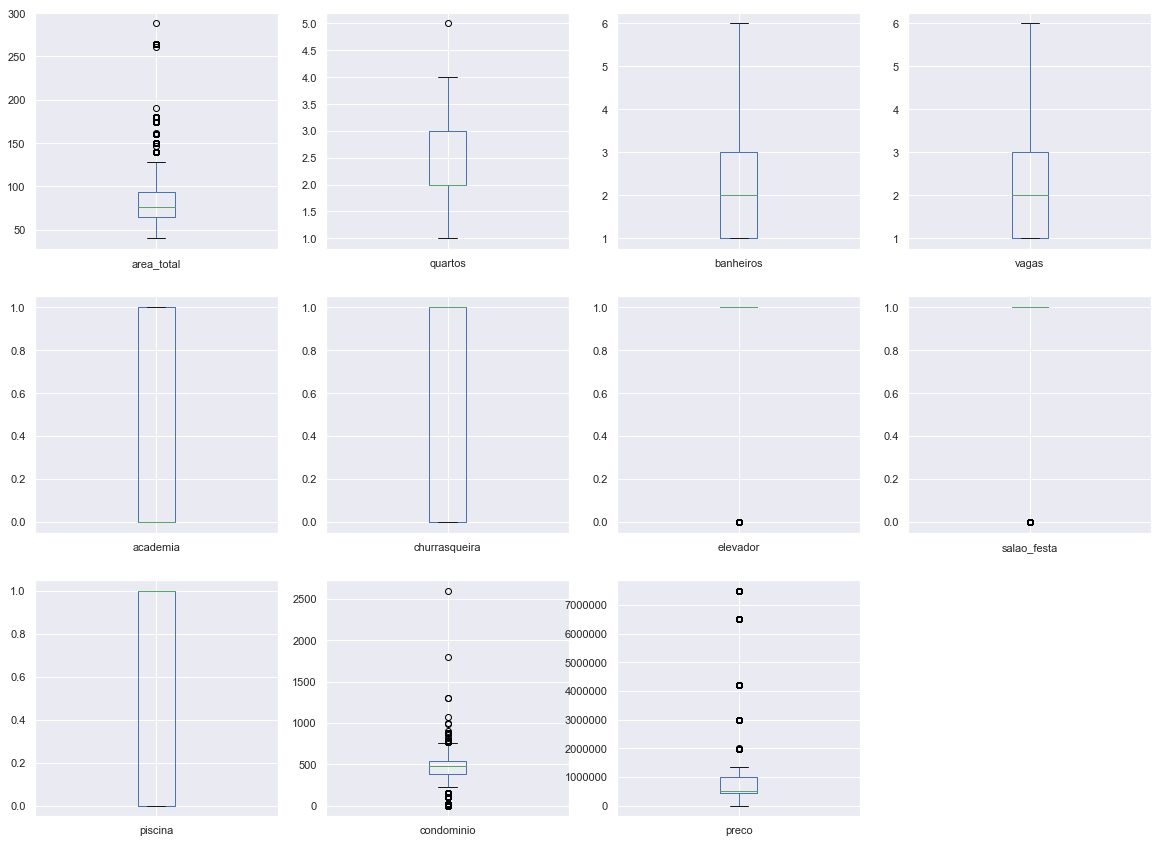

In [54]:
# Com base no explicado sobre outliers, vamos utilizar a remoção de outliers para o atributo preço
# Pelo Box plot abaixo de preço, pode-se observar alguns valores outliers acima.
# Box and Whisker Plots
dfimoveis_SCS.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize=(20,20))
plt.show()

In [55]:
# Ordenando os dados pela coluna preco
dfimoveis_SCS_salvo = dfimoveis_SCS.sort_values(by=['preco']); dfimoveis_SCS_salvo

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
6349,Olimpico,102,3,1,2,0,0,0,0,0,527.0,550
4504,Santa Maria,67,3,3,3,0,1,1,1,1,14.0,240000
2192,Santa Maria,67,3,2,2,1,1,1,1,0,520.0,240000
247,Santa Maria,67,3,1,1,0,1,1,1,1,561.0,240000
2224,Santa Maria,67,3,3,3,0,1,1,1,1,561.0,240000
...,...,...,...,...,...,...,...,...,...,...,...,...
1967,Santa Maria,160,3,3,3,0,1,1,1,1,878.0,7499000
251,Santa Maria,160,3,2,2,1,1,0,1,1,738.0,7499000
1669,Santa Maria,160,3,2,2,0,0,0,0,0,550.0,7499000
2462,Santa Maria,160,3,2,2,0,1,1,1,1,600.0,7499000


In [56]:
# Reorganiza os índices
dfimoveis_SCS_salvo.reset_index(drop=True, inplace=True); dfimoveis_SCS_salvo.head(5)

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,102,3,1,2,0,0,0,0,0,527.0,550
1,Santa Maria,67,3,3,3,0,1,1,1,1,14.0,240000
2,Santa Maria,67,3,2,2,1,1,1,1,0,520.0,240000
3,Santa Maria,67,3,1,1,0,1,1,1,1,561.0,240000
4,Santa Maria,67,3,3,3,0,1,1,1,1,561.0,240000


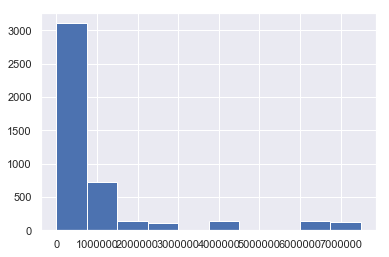

In [57]:
# Apresenta o histograma do atributo preço
# Pode-se observar a presença de valores outliers (extremos) com valores altos
dfimoveis_SCS_salvo.preco.hist()

In [ ]:
# Cria um Boxplot Simples
# Cria uma Figura de tamanho 9x6 cm
fig = plt.figure(1, figsize=(9, 6))

# Cria subplots
# Estes são os parâmetros da grade do subplot codificados como um único inteiro. 
# Por exemplo, "111" significa "grade 1x1, primeiro subplot".
ax = fig.add_subplot(111)

bp = ax.boxplot(dfimoveis_SCS_salvo['preco'])

In [58]:
# A partir daqui vamos aplicar a regra 1.5*FIQ, ou seja,
# outliers baixos estão abaixo de Q1 - 1,5⋅FIQ e outliers altos estão acima de Q3 + 1,5⋅FIQ.
#Obtém o tamanho do dataset, primeiro quartil  e terceiro quartil
tamanho = len(dfimoveis_SCS_salvo)
primeiro_quartil = dfimoveis_SCS_salvo.quantile(q=0.25, axis=0, interpolation='linear')
terceiro_quartil = dfimoveis_SCS_salvo.quantile(q=0.75, axis=0, interpolation='linear')

In [59]:
# qtde de objetos do dataset
tamanho

4471

In [60]:
# Primeiro quartil do preço
primeiro_quartil

area_total           65.0
quartos               2.0
banheiros             1.0
vagas                 1.0
academia              0.0
churrasqueira         0.0
elevador              1.0
salao_festa           1.0
piscina               0.0
condominio          385.0
preco            450000.0
Name: 0.25, dtype: float64

In [61]:
# valor do terceiro quartil
terceiro_quartil

area_total           93.0
quartos               3.0
banheiros             3.0
vagas                 3.0
academia              1.0
churrasqueira         1.0
elevador              1.0
salao_festa           1.0
piscina               1.0
condominio          535.0
preco            990000.0
Name: 0.75, dtype: float64

In [62]:
# Calcula o FIQ
FIQ = terceiro_quartil.preco - primeiro_quartil.preco; FIQ

540000.0

In [63]:
# Agora vem uma das partes mais importantes, vamos usar a regra 1,5xFIQ.
# Considerando o atributo prelo, faremos: Q1 - 1,5⋅FIQ e Q3 + 1,5⋅FIQ.
menor = primeiro_quartil.preco - (int(FIQ) * 1.5)
maior = (int(FIQ) * 1.5) + terceiro_quartil.preco

In [64]:
# outliers baixos estão abaixo do valor "menor".
menor

-360000.0

In [65]:
# outliers altos estão acima do valor "maior".
maior

1800000.0

In [66]:
# Os objetos cujo resultado da comparação do atributo preço e "False" será um outlier
dfimoveis_SCS_salvo.preco > menor

0       True
1       True
2       True
3       True
4       True
        ... 
4466    True
4467    True
4468    True
4469    True
4470    True
Name: preco, Length: 4471, dtype: bool

In [67]:
# Então, qualquer valor abaixo é um outlier e será removido do dataset. 
dfimoveis_SCS_salvo = dfimoveis_SCS_salvo[(dfimoveis_SCS_salvo.preco > menor)]; dfimoveis_SCS_salvo

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,102,3,1,2,0,0,0,0,0,527.0,550
1,Santa Maria,67,3,3,3,0,1,1,1,1,14.0,240000
2,Santa Maria,67,3,2,2,1,1,1,1,0,520.0,240000
3,Santa Maria,67,3,1,1,0,1,1,1,1,561.0,240000
4,Santa Maria,67,3,3,3,0,1,1,1,1,561.0,240000
...,...,...,...,...,...,...,...,...,...,...,...,...
4466,Santa Maria,160,3,3,3,0,1,1,1,1,878.0,7499000
4467,Santa Maria,160,3,2,2,1,1,0,1,1,738.0,7499000
4468,Santa Maria,160,3,2,2,0,0,0,0,0,550.0,7499000
4469,Santa Maria,160,3,2,2,0,1,1,1,1,600.0,7499000


In [68]:
# Os objetos cujo resultado da comparação do atributo preço e "False" será um outlier
dfimoveis_SCS_salvo.preco < maior

0        True
1        True
2        True
3        True
4        True
        ...  
4466    False
4467    False
4468    False
4469    False
4470    False
Name: preco, Length: 4471, dtype: bool

In [69]:
# Então, qualquer valor acima é um outlier e será removido.
dfimoveis_SCS_salvo = dfimoveis_SCS_salvo[(dfimoveis_SCS_salvo.preco < maior)]; dfimoveis_SCS_salvo

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,102,3,1,2,0,0,0,0,0,527.0,550
1,Santa Maria,67,3,3,3,0,1,1,1,1,14.0,240000
2,Santa Maria,67,3,2,2,1,1,1,1,0,520.0,240000
3,Santa Maria,67,3,1,1,0,1,1,1,1,561.0,240000
4,Santa Maria,67,3,3,3,0,1,1,1,1,561.0,240000
...,...,...,...,...,...,...,...,...,...,...,...,...
3826,Santa Paula,180,3,2,2,1,0,0,1,1,430.0,1200000
3827,Santa Paula,180,3,2,2,0,1,1,1,1,561.0,1200000
3828,Santa Paula,180,3,1,1,0,1,1,1,1,500.0,1200000
3829,Santa Paula,180,3,2,2,0,0,1,1,0,351.0,1200000


In [70]:
# mostra o shape (total de registros por colunas)
dfimoveis_SCS_salvo.shape

(3831, 12)

In [ ]:
# Cria um Boxplot Simples
# Cria uma Figura de tamanho 9x6 cm
fig = plt.figure(1, figsize=(9, 6))

# Cria subplots
# Estes são os parâmetros da grade do subplot codificados como um único inteiro. 
# Por exemplo, "111" significa "grade 1x1, primeiro subplot".
ax = fig.add_subplot(111)

bp = ax.boxplot(dfimoveis_SCS_salvo['preco'])

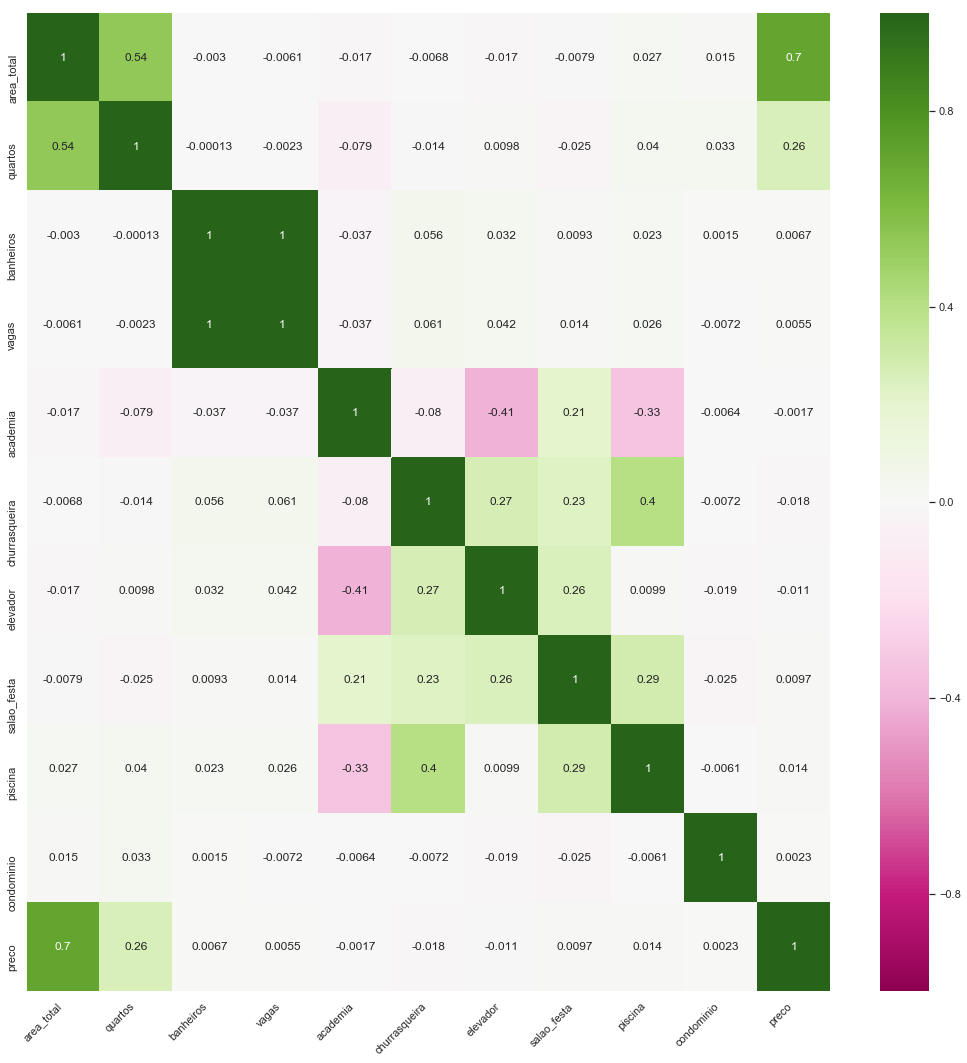

In [72]:
# apresenta o mapa de calor resultante 
ax = sns.heatmap(dfimoveis_SCS_salvo.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(18,18)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);

Observe pelo "mapa de calor" como a influência do atributo área_total e quartos no cálculo do preço ficou significativamente maior após a remoção dos outliers (compare com o mapa de calor anterior). Indicando uma remoção acertada dos outliers!

In [73]:
# Grava os aptos de São Caetano do Sul após a limpeza
dfimoveis_SCS_salvo.to_csv("imoveis_SCS_depoislimpeza.csv", index=False)

## Normalização - "Min-Max Scaler"

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. 

Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. 

Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. 

Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. 

Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. 

O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [79]:
# Import dos módulos
from sklearn.preprocessing import MinMaxScaler

In [74]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfimoveis_SCS_limpa = pd.read_csv('imoveis_SCS_depoislimpeza.csv', sep = ',', encoding = 'UTF-8')

In [75]:
# Apresenta os dados
dfimoveis_SCS_limpa.head(3)

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,102,3,1,2,0,0,0,0,0,527.0,550
1,Santa Maria,67,3,3,3,0,1,1,1,1,14.0,240000
2,Santa Maria,67,3,2,2,1,1,1,1,0,520.0,240000


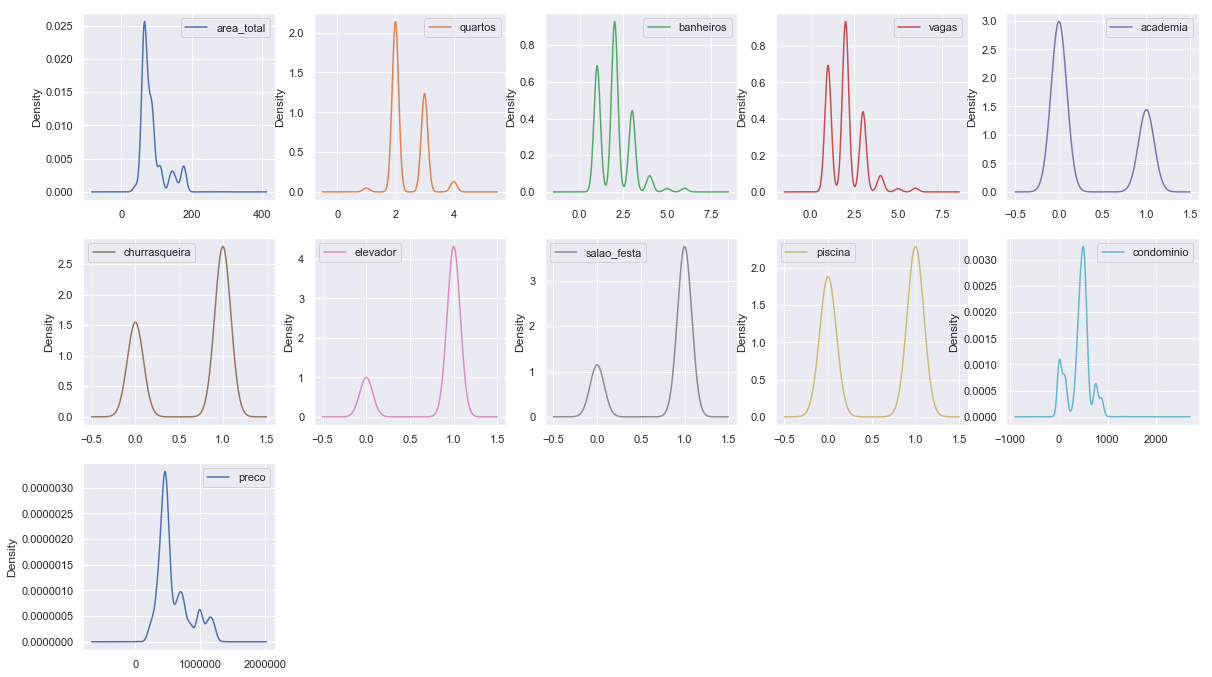

In [76]:
# Density Plot Univariado
dfimoveis_SCS_limpa.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))
plt.show()

In [77]:
# Obtém os valores X a normalizar: quartos banheiros e vagas
array = dfimoveis_SCS_limpa.values; X = array[:,2:5] # todos os registros colunas 2 a 5 (exclusivo)

In [80]:
# Transformando os dados para a mesma escala (entre 0 e 1)
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1)) # obtém o objeto que realiza a escala 
rescaledX = scaler.fit_transform(X)  # aplica a escala

C:\Users\icalc\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [81]:
# Identifica o tipo do objeto retornado em rescaledX
type(rescaledX)

numpy.ndarray

In [82]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", X)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[3 1 2]
 [3 3 3]
 [3 2 2]
 ...
 [3 1 1]
 [3 2 2]
 [4 5 3]]

Dados Normalizados: 

 [[0.66666667 0.         0.2       ]
 [0.66666667 0.4        0.4       ]
 [0.66666667 0.2        0.2       ]
 ...
 [0.66666667 0.         0.        ]
 [0.66666667 0.2        0.2       ]
 [1.         0.8        0.4       ]]


In [83]:
# Apresenta o shape do array
array[:,0:2].shape

(3831, 2)

In [84]:
# Apresenta o shape do rescaledX
rescaledX.shape

(3831, 3)

In [85]:
# Apresenta o shape do array a partir da 5a posição
array[:,5:].shape

(3831, 7)

In [86]:
# Retornando os valores para o array concatenando todos em um único arrayAtual
arrayAtual = np.column_stack((array[:,0:2], rescaledX))
arrayAtual = np.column_stack((arrayAtual, array[:,5:]))

In [87]:
# Array concatenado e seu formato
arrayAtual.shape

(3831, 12)

In [88]:
# Cria um dataframe a partir do array finalizado
dataframeCriado = pd.DataFrame(arrayAtual)

In [89]:
# Mostra os 5 primeiros registros
dataframeCriado.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Olimpico,102,0.666667,0,0.2,0,0,0,0,0,527,550
1,Santa Maria,67,0.666667,0.4,0.4,0,1,1,1,1,14,240000
2,Santa Maria,67,0.666667,0.2,0.2,1,1,1,1,0,520,240000
3,Santa Maria,67,0.666667,0,0,0,1,1,1,1,561,240000
4,Santa Maria,67,0.666667,0.4,0.4,0,1,1,1,1,561,240000


In [90]:
# Modifica os nomes das colunas para o nome original
dataframeCriado.columns = dfimoveis_SCS_limpa.columns

In [91]:
# Reinserindo os dados normalizados para o dataframe original
dfimoveis_SCS_limpa = dataframeCriado

In [92]:
# mostrando os dados do dataframe normalizados
dfimoveis_SCS_limpa.head()

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,102,0.666667,0,0.2,0,0,0,0,0,527,550
1,Santa Maria,67,0.666667,0.4,0.4,0,1,1,1,1,14,240000
2,Santa Maria,67,0.666667,0.2,0.2,1,1,1,1,0,520,240000
3,Santa Maria,67,0.666667,0,0,0,1,1,1,1,561,240000
4,Santa Maria,67,0.666667,0.4,0.4,0,1,1,1,1,561,240000


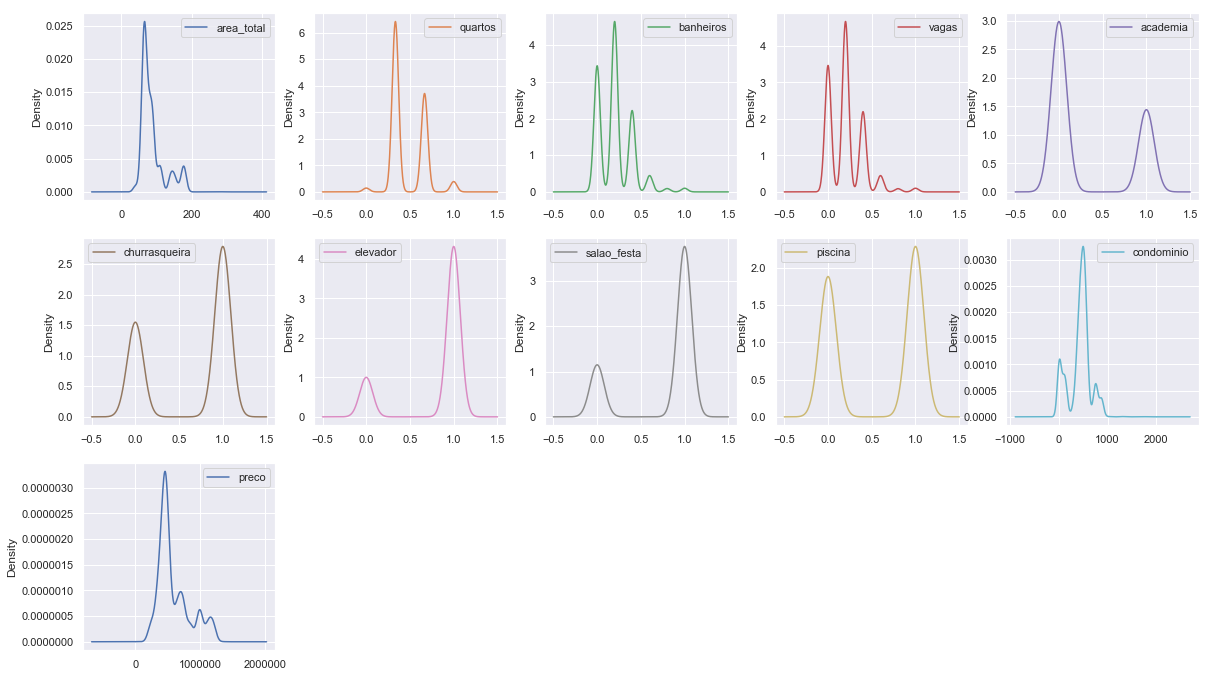

In [93]:
# Density Plot Univariado
dfimoveis_SCS_limpa.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))
plt.show()

Observe os valores do eixo x para quartos, banheiros e vagas após a normalização. 

Os valores do eixo x ficaram entre 0 e 1.

In [94]:
# Grava os aptos de São Caetano do Sul normalizados com Min-max
dfimoveis_SCS_limpa.to_csv("imoveis_SCS_minmax.csv", index=False)

## Normalização: Padronização (escore-z)

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1. 

Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. 

Funciona bem quando os dados já estão na mesma escala. 

O scikit-learn possui uma função para esta etapa, chamada StandardScaler().

In [95]:
# Import dos módulos associados ao escore-z
from sklearn.preprocessing import StandardScaler

In [96]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfimoveis_SCS_normal = pd.read_csv('imoveis_SCS_minmax.csv', sep = ',', encoding = 'UTF-8')

In [97]:
# Apresenta os dados
# A normalização escore-z será aplicada aos atributos area_tota e condominio
dfimoveis_SCS_normal.head(3)

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,102,0.666667,0.0,0.2,0,0,0,0,0,527.0,550
1,Santa Maria,67,0.666667,0.4,0.4,0,1,1,1,1,14.0,240000
2,Santa Maria,67,0.666667,0.2,0.2,1,1,1,1,0,520.0,240000


Média: 88.03706604019838, Desvio Padrão: 34.32733207777168


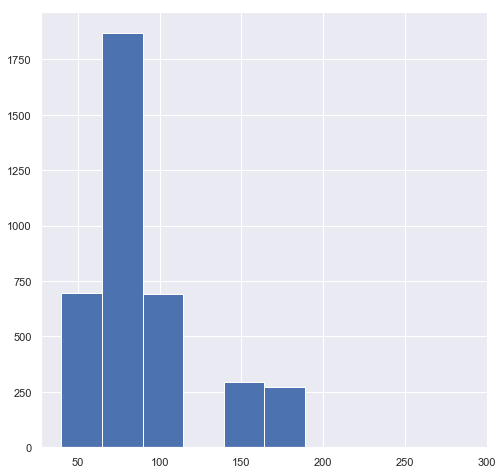

In [98]:
# Apresenta o histograma com a média e o desvio padrão do atributo area_total
dfimoveis_SCS_normal.area_total.hist(figsize=(8,8))
print("Média: {}, Desvio Padrão: {}".format(dfimoveis_SCS_normal.area_total.mean(), dfimoveis_SCS_normal.area_total.std()))

In [99]:
# Obtém os valores X a normalizar: area_total
array = dfimoveis_SCS_normal.values; X = array[:,1:2] # todos os registros colunas 1 a 2 (exclusivo)

In [100]:
# Apresenta o array obtido
X

array([[102],
       [67],
       [67],
       ...,
       [180],
       [180],
       [288]], dtype=object)

In [101]:
# Como o array é unidimensional e a função de padronização precisa de pelo menos duas dimensões
# necessário fazer um reshape (CUIDADO: se o seu array tem mais de uma dimensão esta linha é denecessária)
X = X.reshape(-1,1); X

array([[102],
       [67],
       [67],
       ...,
       [180],
       [180],
       [288]], dtype=object)

In [102]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão) para o atributo area_total
# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

C:\Users\icalc\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\icalc\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [103]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", X)
print("\nDados Padronizados: \n\n", standardX)

Dados Originais: 

 [[102]
 [67]
 [67]
 ...
 [180]
 [180]
 [288]]

Dados Padronizados: 

 [[ 0.40681159]
 [-0.6129172 ]
 [-0.6129172 ]
 ...
 [ 2.67935005]
 [ 2.67935005]
 [ 5.82594175]]


In [104]:
# Copiando o resultado da padronização para a coluna metros
dfimoveis_SCS_normal.area_total = standardX

In [105]:
# Apresenta o dataframe normalizado e padronizado
dfimoveis_SCS_normal.head()

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,0.406812,0.666667,0.0,0.2,0,0,0,0,0,527.0,550
1,Santa Maria,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,14.0,240000
2,Santa Maria,-0.612917,0.666667,0.2,0.2,1,1,1,1,0,520.0,240000
3,Santa Maria,-0.612917,0.666667,0.0,0.0,0,1,1,1,1,561.0,240000
4,Santa Maria,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,561.0,240000


In [106]:
# Média depois da padronização
dfimoveis_SCS_normal.area_total.mean()

5.682162591602811e-15

In [107]:
# Desvio padrão depois da padronização
dfimoveis_SCS_normal.area_total.std()

1.0001305397825564

In [108]:
# Obtém os valores X a normalizar: condominio
array = dfimoveis_SCS_normal.values; X = array[:,10:11] # todos os registros colunas 10 a 11 (exclusivo)

In [109]:
# Apresenta o array obtido
X

array([[527.0],
       [14.0],
       [520.0],
       ...,
       [500.0],
       [351.0],
       [1800.0]], dtype=object)

In [110]:
# Como o array é unidimensional e a função de padronização precisa de pelo menos duas dimensões
# necessário fazer um reshape (CUIDADO: se o seu array tem mais de uma dimensão esta linha é denecessária)
X = X.reshape(-1,1); X

array([[527.0],
       [14.0],
       [520.0],
       ...,
       [500.0],
       [351.0],
       [1800.0]], dtype=object)

In [111]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão) para o atributo condominio
# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

C:\Users\icalc\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\icalc\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [112]:
# Sumarizando os dados transformados
print("Dados Originais: \n\n", X)
print("\nDados Padronizados: \n\n", standardX)

Dados Originais: 

 [[527.0]
 [14.0]
 [520.0]
 ...
 [500.0]
 [351.0]
 [1800.0]]

Dados Padronizados: 

 [[ 0.44050239]
 [-1.85580237]
 [ 0.4091688 ]
 ...
 [ 0.31964425]
 [-0.34731367]
 [ 6.13874013]]


In [113]:
# Copiando o resultado da padronização para a coluna metros
dfimoveis_SCS_normal.condominio = standardX

In [114]:
# Apresenta o dataframe normalizado e padronizado
dfimoveis_SCS_normal.head()

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,0.406812,0.666667,0.0,0.2,0,0,0,0,0,0.440502,550
1,Santa Maria,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,-1.855802,240000
2,Santa Maria,-0.612917,0.666667,0.2,0.2,1,1,1,1,0,0.409169,240000
3,Santa Maria,-0.612917,0.666667,0.0,0.0,0,1,1,1,1,0.592694,240000
4,Santa Maria,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,0.592694,240000


In [115]:
# Média depois da padronização
dfimoveis_SCS_normal.condominio.mean()

1.1962935645138727e-16

In [116]:
# Desvio padrão depois da padronização
dfimoveis_SCS_normal.condominio.std()

1.0001305397825506

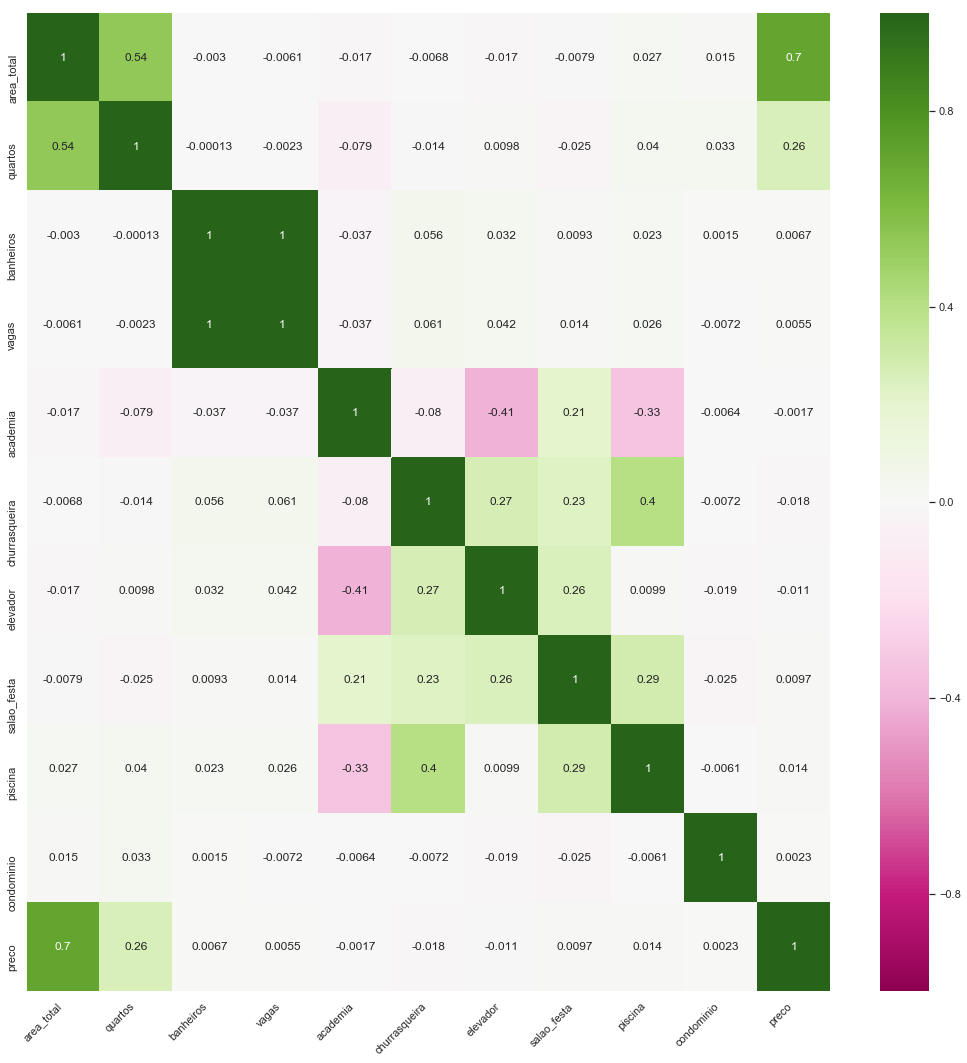

In [117]:
# apresenta o mapa de calor resultante 
ax = sns.heatmap(dfimoveis_SCS_normal.corr(), vmin=-1, vmax=1, center=0, annot=True, cmap = "PiYG")
sns.set(rc={'figure.figsize':(18,18)})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45, # rotaciona o eixo y 45o
    horizontalalignment='right' 
);

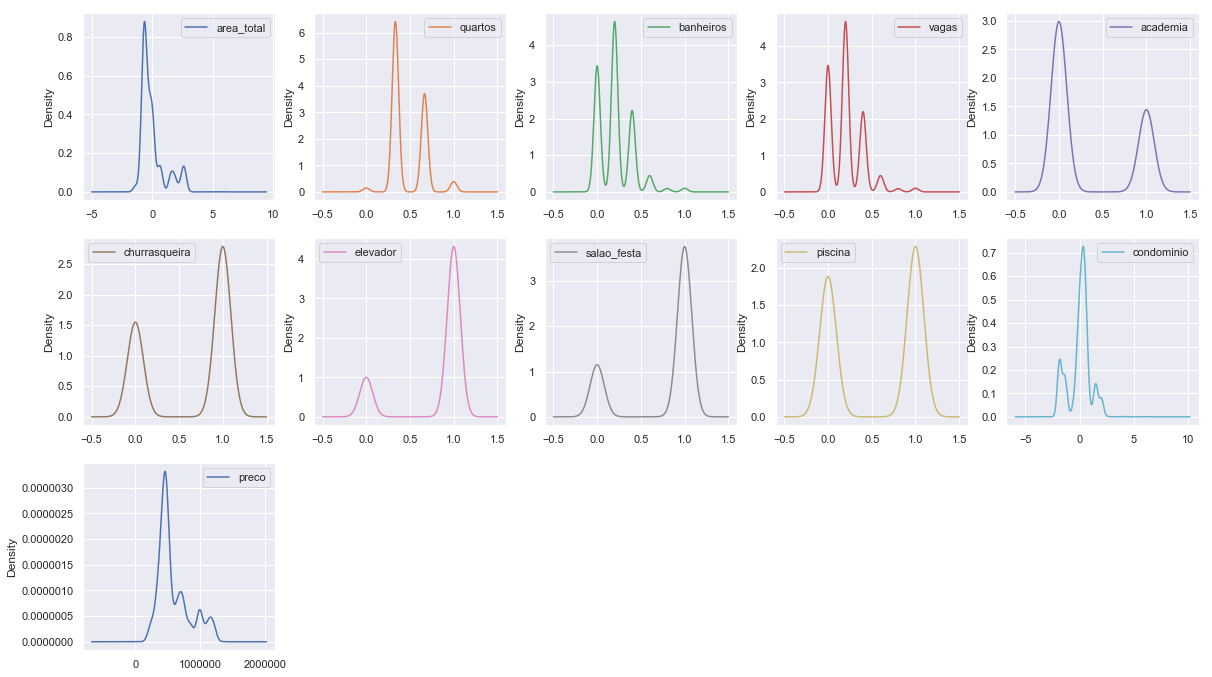

In [118]:
# Density Plot Univariado
dfimoveis_SCS_normal.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize=(20,20))
plt.show()

Observe que todos os atributos preditores estão com valores entre -1 e 1.

In [119]:
# Grava os aptos de São Caetano do Sul normalizados com Min-max
dfimoveis_SCS_normal.to_csv("imoveis_SCS_escorez.csv", index=False)

## One-Hot Encoding: Convertendo: Variáveis categóricas em numéricas

Como manter as mesmas informações nas variáveis categóricas, transformando-as em variáveis numéricas (re-contextualizar 
os atributos). Ou seja, modificar o conjunto de dados sem perder o mesmo nível de informação. 

In [120]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfimoveis_SCS_normal = pd.read_csv('imoveis_SCS_escorez.csv', sep = ',', encoding = 'UTF-8')

In [121]:
# mostra o shape (total de registros por colunas)
dfimoveis_SCS_normal.shape

(3831, 12)

In [122]:
# Apresenta os quatro primeiros registros
dfimoveis_SCS_normal.head(4)

,bairro,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,preco
0,Olimpico,0.406812,0.666667,0.0,0.2,0,0,0,0,0,0.440502,550
1,Santa Maria,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,-1.855802,240000
2,Santa Maria,-0.612917,0.666667,0.2,0.2,1,1,1,1,0,0.409169,240000
3,Santa Maria,-0.612917,0.666667,0.0,0.0,0,1,1,1,1,0.592694,240000


In [123]:
# Realiza o agrupamento por bairro
dfimoveis_SCS_normal.groupby('bairro').size()

bairro
Barcelona             508
Boa Vista             282
Centro                122
Ceramica              510
Fundacao              177
Jardim Sao Caetano    105
Maua                  134
Nova Gerty            191
Olimpico              270
Osvaldo Cruz          103
Santa Maria           428
Santa Paula           685
Santo Antonio         316
dtype: int64

In [124]:
# Identifica o total de bairros
dfimoveis_SCS_normal.bairro.nunique()

13

In [125]:
# converte as variáveis categóricas (mais de dois valores por atributo) para dummies (numéricas)
# Ou seja, aplica o One-Hot Encoding
dfimoveis_SCS_dummies = pd.get_dummies(dfimoveis_SCS_normal)
dfimoveis_SCS_dummies

,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,...,bairro_Ceramica,bairro_Fundacao,bairro_Jardim Sao Caetano,bairro_Maua,bairro_Nova Gerty,bairro_Olimpico,bairro_Osvaldo Cruz,bairro_Santa Maria,bairro_Santa Paula,bairro_Santo Antonio
0,0.406812,0.666667,0.0,0.2,0,0,0,0,0,0.440502,...,0,0,0,0,0,1,0,0,0,0
1,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,-1.855802,...,0,0,0,0,0,0,0,1,0,0
2,-0.612917,0.666667,0.2,0.2,1,1,1,1,0,0.409169,...,0,0,0,0,0,0,0,1,0,0
3,-0.612917,0.666667,0.0,0.0,0,1,1,1,1,0.592694,...,0,0,0,0,0,0,0,1,0,0
4,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,0.592694,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,2.679350,0.666667,0.2,0.2,1,0,0,1,1,0.006308,...,0,0,0,0,0,0,0,0,1,0
3827,2.679350,0.666667,0.2,0.2,0,1,1,1,1,0.592694,...,0,0,0,0,0,0,0,0,1,0
3828,2.679350,0.666667,0.0,0.0,0,1,1,1,1,0.319644,...,0,0,0,0,0,0,0,0,1,0
3829,2.679350,0.666667,0.2,0.2,0,0,1,1,0,-0.347314,...,0,0,0,0,0,0,0,0,1,0


In [126]:
# Reorganiza os índices
dfimoveis_SCS_dummies.reset_index(inplace=True); dfimoveis_SCS_dummies

,index,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,...,bairro_Ceramica,bairro_Fundacao,bairro_Jardim Sao Caetano,bairro_Maua,bairro_Nova Gerty,bairro_Olimpico,bairro_Osvaldo Cruz,bairro_Santa Maria,bairro_Santa Paula,bairro_Santo Antonio
0,0,0.406812,0.666667,0.0,0.2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,2,-0.612917,0.666667,0.2,0.2,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,-0.612917,0.666667,0.0,0.0,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,4,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,3826,2.679350,0.666667,0.2,0.2,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3827,3827,2.679350,0.666667,0.2,0.2,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3828,3828,2.679350,0.666667,0.0,0.0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
3829,3829,2.679350,0.666667,0.2,0.2,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [127]:
dfimoveis_SCS_dummies.drop(columns=['index'], inplace=True); dfimoveis_SCS_dummies

,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,...,bairro_Ceramica,bairro_Fundacao,bairro_Jardim Sao Caetano,bairro_Maua,bairro_Nova Gerty,bairro_Olimpico,bairro_Osvaldo Cruz,bairro_Santa Maria,bairro_Santa Paula,bairro_Santo Antonio
0,0.406812,0.666667,0.0,0.2,0,0,0,0,0,0.440502,...,0,0,0,0,0,1,0,0,0,0
1,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,-1.855802,...,0,0,0,0,0,0,0,1,0,0
2,-0.612917,0.666667,0.2,0.2,1,1,1,1,0,0.409169,...,0,0,0,0,0,0,0,1,0,0
3,-0.612917,0.666667,0.0,0.0,0,1,1,1,1,0.592694,...,0,0,0,0,0,0,0,1,0,0
4,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,0.592694,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,2.679350,0.666667,0.2,0.2,1,0,0,1,1,0.006308,...,0,0,0,0,0,0,0,0,1,0
3827,2.679350,0.666667,0.2,0.2,0,1,1,1,1,0.592694,...,0,0,0,0,0,0,0,0,1,0
3828,2.679350,0.666667,0.0,0.0,0,1,1,1,1,0.319644,...,0,0,0,0,0,0,0,0,1,0
3829,2.679350,0.666667,0.2,0.2,0,0,1,1,0,-0.347314,...,0,0,0,0,0,0,0,0,1,0


In [128]:
# Grava os aptos de SCS após o One-hot Encoding
dfimoveis_SCS_dummies.to_csv("imoveis_SCS_oneHot.csv", index=False)

# Ordenando o Dataset

Colocando o atributo alvo "preco" como último atributo do conjunto

Primeiramente vamos ler o dataset e ordenar as colunas colocando o atributo alvo na coluna final

In [129]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook) com a Preparação dos dados realizada
# Leitura do arquivo CSV com separador "," e codificação UTF-8
dfimoveis_SCS_preparados = pd.read_csv('imoveis_SCS_oneHot.csv', sep = ',', encoding = 'UTF-8')

In [130]:
# apresenta os dados
dfimoveis_SCS_preparados.head(3)

,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,...,bairro_Ceramica,bairro_Fundacao,bairro_Jardim Sao Caetano,bairro_Maua,bairro_Nova Gerty,bairro_Olimpico,bairro_Osvaldo Cruz,bairro_Santa Maria,bairro_Santa Paula,bairro_Santo Antonio
0,0.406812,0.666667,0.0,0.2,0,0,0,0,0,0.440502,...,0,0,0,0,0,1,0,0,0,0
1,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,-1.855802,...,0,0,0,0,0,0,0,1,0,0
2,-0.612917,0.666667,0.2,0.2,1,1,1,1,0,0.409169,...,0,0,0,0,0,0,0,1,0,0


In [131]:
# troca branco por espaço nas colunas spaces with '_'  
dfimoveis_SCS_preparados.columns = [column.replace(" ", "_") for column in dfimoveis_SCS_preparados.columns] 

In [132]:
# Obtendo o conjunto de nomes dos atributos e colocando em uma lista
cols =dfimoveis_SCS_preparados.columns.tolist(); cols

['area_total',
 'quartos',
 'banheiros',
 'vagas',
 'academia',
 'churrasqueira',
 'elevador',
 'salao_festa',
 'piscina',
 'condominio',
 'preco',
 'bairro_Barcelona',
 'bairro_Boa_Vista',
 'bairro_Centro',
 'bairro_Ceramica',
 'bairro_Fundacao',
 'bairro_Jardim_Sao_Caetano',
 'bairro_Maua',
 'bairro_Nova_Gerty',
 'bairro_Olimpico',
 'bairro_Osvaldo_Cruz',
 'bairro_Santa_Maria',
 'bairro_Santa_Paula',
 'bairro_Santo_Antonio']

In [133]:
# Alterando a ordem da lista dos nomes dos atributos para que o preço (atributo alvo) seja o último atributo do conjunto
cols_salvo = cols[0:10] + cols[11:]; 
cols_salvo.append(cols[10]); cols_salvo

['area_total',
 'quartos',
 'banheiros',
 'vagas',
 'academia',
 'churrasqueira',
 'elevador',
 'salao_festa',
 'piscina',
 'condominio',
 'bairro_Barcelona',
 'bairro_Boa_Vista',
 'bairro_Centro',
 'bairro_Ceramica',
 'bairro_Fundacao',
 'bairro_Jardim_Sao_Caetano',
 'bairro_Maua',
 'bairro_Nova_Gerty',
 'bairro_Olimpico',
 'bairro_Osvaldo_Cruz',
 'bairro_Santa_Maria',
 'bairro_Santa_Paula',
 'bairro_Santo_Antonio',
 'preco']

In [134]:
# Obtém o dataset contendo as colunas na ordem correta 
dfimoveis_SCS_preparados_colunasOk = dfimoveis_SCS_preparados[cols_salvo]; dfimoveis_SCS_preparados_colunasOk.head(3)

,area_total,quartos,banheiros,vagas,academia,churrasqueira,elevador,salao_festa,piscina,condominio,...,bairro_Fundacao,bairro_Jardim_Sao_Caetano,bairro_Maua,bairro_Nova_Gerty,bairro_Olimpico,bairro_Osvaldo_Cruz,bairro_Santa_Maria,bairro_Santa_Paula,bairro_Santo_Antonio,preco
0,0.406812,0.666667,0.0,0.2,0,0,0,0,0,0.440502,...,0,0,0,0,1,0,0,0,0,550
1,-0.612917,0.666667,0.4,0.4,0,1,1,1,1,-1.855802,...,0,0,0,0,0,0,1,0,0,240000
2,-0.612917,0.666667,0.2,0.2,1,1,1,1,0,0.409169,...,0,0,0,0,0,0,1,0,0,240000


In [135]:
# Apresenta a forma final
dfimoveis_SCS_preparados_colunasOk.shape

(3831, 24)

In [136]:
# Mostra as colunas do dataset
dfimoveis_SCS_preparados_colunasOk.columns

Index(['area_total', 'quartos', 'banheiros', 'vagas', 'academia',
       'churrasqueira', 'elevador', 'salao_festa', 'piscina', 'condominio',
       'bairro_Barcelona', 'bairro_Boa_Vista', 'bairro_Centro',
       'bairro_Ceramica', 'bairro_Fundacao', 'bairro_Jardim_Sao_Caetano',
       'bairro_Maua', 'bairro_Nova_Gerty', 'bairro_Olimpico',
       'bairro_Osvaldo_Cruz', 'bairro_Santa_Maria', 'bairro_Santa_Paula',
       'bairro_Santo_Antonio', 'preco'],
      dtype='object')

In [137]:
# Grava os aptos de São Caetano do Sul com dados preparados e colunas ok
dfimoveis_SCS_preparados_colunasOk.to_csv("imoveis_SCS_preparadosColOk.csv", index=False)

### <font size = '2'>prof. Dr. Ivan Carlos Alcântara de Oliveira</font> - <font color="blue">https://orcid.org/0000-0002-6020-7535</font><br><font size = '2'>e-mail: ivan.oliveira@mackenzie.br</font>